import necessary libraries

In [576]:
from pylab import *
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

In [578]:

from random import randrange
import matplotlib.ticker as ticker

In [580]:
from celluloid import Camera # importando a camera
import seaborn as sns
import warnings
from IPython.display import HTML # para mostrar o vídeo no jupyter

### Problem 1 - dice game

Alternative **a)** two random numbers

In [4]:
a = randrange(1, 7)
b = randrange(1, 7)

print(a, b)

4 2


Alternative **b)** proportion of 6-6 dices simultaneously

In [6]:
N = 1000000

count = 0

for i in range(N):
  x = randrange(1, 7)
  y = randrange(1, 7)

  if x == 6 and y == 6:
    count += 1

print(count/N)
print(1/36)

0.028301
0.027777777777777776


### Problem 2 - radioactive decay chain

exemple 10.1 Newman

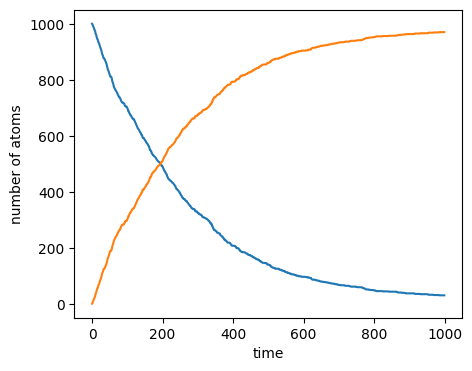

In [474]:
NTl = 1000
NPb = 0

tau = 3.053*60
h = 1.0
p = 1 - 2**(-h/tau)
tmax = 1000

tpoints = arange(0, tmax, h)
Tlpoints = []
Pbpoints = []

for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    decay = 0
    for i in range(NTl):
        if random()<p:
            decay += 1
    NTl -= decay
    NPb += decay

figure(figsize=(5,4))
plot(tpoints, Tlpoints)
plot(tpoints, Pbpoints)
xlabel('time')
ylabel('number of atoms')
show()

**All Alternatives** - calculate the decay from $^{213}Bi$ to $^{209}Bi$

In [300]:
def probability(tau):
    return 1 - 2**(-1/tau)

In [478]:
tau_Bi213 = 46*60
tau_Tl = 2.2*60
tau_Pb = 3.3*60

h = 1.0

tmax = 20000
tpoints = arange(0, tmax, h)

Nbi213 = 20000
NPb = 0
NTl = 0
NBi = 0

Bi213points = []
Bipoints = []
Tlpoints = []
Pbpoints = []

for t in tpoints:
    Bi213points.append(Nbi213)
    Pbpoints.append(NPb)
    Tlpoints.append(NTl)
    Bipoints.append(NBi)

                            # alternative c)
    bi213_pb, bi213_tl = 0, 0
    for i in range(Nbi213):
        if random()<probability(2760):
            if random()<0.9791:
                bi213_pb += 1
            else:
                bi213_tl += 1
    Nbi213 -= bi213_pb
    NPb += bi213_pb

    Nbi213 -= bi213_tl
    NTl += bi213_tl

                            # alternative b)
    tl_pb = 0
    for j in range(NTl):
        if random()<probability(132):
            tl_pb += 1
    NTl -= tl_pb
    NPb += tl_pb

                            # alternative a)
    pb_bi = 0
    for k in range(NPb):
        if random()<probability(198):
            pb_bi += 1
    NPb -= pb_bi
    NBi += pb_bi

Final results after t = 20000

NBi213 = 119, NPb = 8, NTl = 0, NBi = 19873


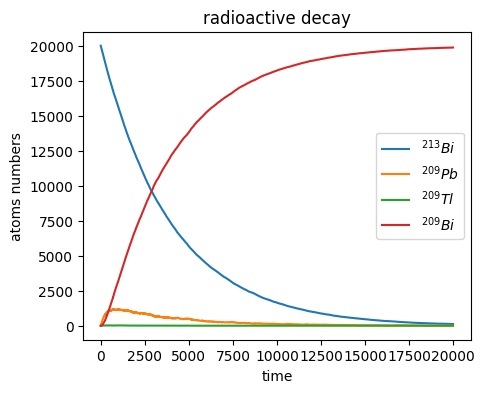

In [487]:
figure(figsize=(5,4))
plot(tpoints, Bi213points, label=r"$^{213}Bi$")
plot(tpoints, Pbpoints, label=r"$^{209}Pb$")
plot(tpoints, Tlpoints, label=r"$^{209}Tl$")
plot(tpoints, Bipoints, label=r"$^{209}Bi$")
title("radioactive decay")
xlabel("time")
ylabel("atoms numbers")
legend()
print(f'Final results after t = {tmax}\n')
print(f'NBi213 = {Nbi213}, NPb = {NPb}, NTl = {NTl}, NBi = {NBi}')

### Problem 3 - random path

In [627]:
def celluloid(xaxis, yaxis, xlim, ylim, title, ylabel, xlabel, interval, type):
    
    fig, ax = plt.subplots(figsize=(5, 3)) # criando minha fig    
    camera = Camera(fig)# a camera recebe a figura que vamos usar
    ax.set_title(f'{title}')
    ax.set_xlim(0, 2*xlim)
    ax.set_ylim(0, 2*ylim)
    ax.grid()
    
    if type == 'curve':
        for i in range(len(xaxis)):
            new_xaxis = xaxis[:i]
            new_yaxis = yaxis[:i]
    
            # ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
            # ax.ticklabel_format(style='sci', axis='y', scilimits=(3, 3))
            
            ax.set_xlabel(xlabel)
            ax.set_ylabel(ylabel)
            
            ax.plot(new_xaxis, new_yaxis, c='tab:blue')
            plt.tight_layout()  # Ajusta o layout para evitar cortes
            camera.snap() # tirar foto da fig

    animation = camera.animate(interval=interval) # animação pronta!
    plt.close(fig)
    return HTML(animation.to_html5_video()) #mostrando a animação no notebook

In [679]:
L = 101
steps = 2000

x = arange(0, L-1, 1)
y = arange(0, L-1, 1)

xpos, ypos = len(x)/2, len(y)/2
xall_pos, yall_pos = [], []

for i in range(steps):
    rand = randrange(0, 4)

    if rand == 0 and xpos > 1:
        xpos -= 1
    elif rand == 1 and xpos < L-1:
        xpos += 1
    elif rand ==2 and ypos > 1:
        ypos -= 1
    elif rand == 3 and ypos < L-1:
        ypos += 1
        
    xall_pos.append(xpos)
    yall_pos.append(ypos)

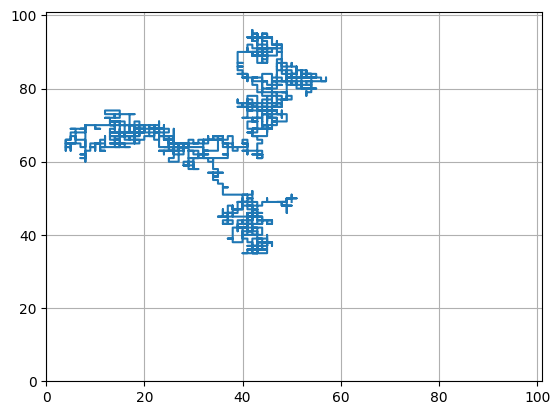

In [681]:
plot(xall_pos, yall_pos)
xlim(0, L)
ylim(0, L)
grid()

In [683]:
ax = (L-1)/2
half_xlim = ax
half_ylim = ax
celluloid(xall_pos, yall_pos, half_xlim, half_ylim, title='Brownian motion', xlabel='x_axis', ylabel='y_axis', interval=5, type='curve')